# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Samuel
- Matthew
- Caitlin
- Darren
- Nicholas

<a id='research_question'></a>
# Research Question

Do large online communities ( of retail traders) have influence over the stock market?

*Sentiment analysis of positivity on the Reddit subreddit r/WallStreetBets and how this correlates to the performance of the S&P 500 from January 31, 2012 to the present.*

<a id='background'></a>

## Background & Prior Work

### Introduction to Topic

Reddit was considered a good community for us to hone in on for our topic not just because of its size, but also because it has a dedicated system for us to more easily scrape semi-structured data from the site. We are able to do this with the Python Reddit API Wrapper (PRAW). For the past few days the subreddit r/WallStreetBets has been the center of the trading world with its short squeeze of the Gamestock (GME), AMC Theaters (AMC), and BlackBerry (BB) stocks and more. Their history of trading in a reckless manner goes back much further than just the past few weeks. In this project we look at the trading done in the months leading up to and during the Covid-19 pandemic and how it correlates to several stocks including the S&P 500, TSLA, GME, and more.

### Summary of Prior Work

Keith Gill, also know as the Roaring Kitty on Reddit, Tik Tok, and Youtube, invested $53,000 into GameStop (3). Recently he and his followers invested into GameStop against hedge funds and went against Wall Street norms. He and his fellow investors drove up the price of GameStop, which is still climbing to this day (4). Because Gill's base was mainly on Reddit, we were curious if there was any correlation with the positivity of the subreddit he frequented and the S&P 500. We did some research to see if scraping data from reddit was possible, and according to (2), it would be quite simple to create our own dataset using Reddit's API. We also looked into Kaggle, to see what our ideal dataset would look like (1). Using these resources, we feel confident in our ability to webscrape our own Reddit dataset. We also looked into downloading a dataset from websites that have the history and time periods of stocks. Yahoo Finance provides an easy way to download a dataset with the variables we need in .csv format (4).


References (include links):
- 1) https://www.kaggle.com/shergreen/wallstreetbets-subreddit-submissions
- 2) https://towardsdatascience.com/scraping-reddit-data-1c0af3040768
- 3) https://www.nytimes.com/2021/01/29/technology/roaring-kitty-reddit-gamestop-markets.html
- 4) https://finance.yahoo.com/quote/GME

# Hypothesis


We hypothesize that there is a correlation between the positivity on the subreddit and the performance of the S&P 500 due to global and local events. Global events, especially the COVID-19 pandemic, may hold an influence over the subreddit and the market.
- We also hypothesize that there will be a positive linear relationship between the performance of the S&P 500 and positivity on the popular subredditr r/WallStreetBets.

# Dataset(s)

#### Stock Dataset

- Dataset Name: S&P 500 
- Link to the dataset: https://www.investing.com/indices/us-spx-500-historical-data
- Number of observations: 2,275

This dataset contains the date, open, high, low, close, adjusted close, and volume of the S&P 500 from January 31, 2012 to February 12, 2021. We got this dataset from Investing.com, which allows us to easily download the history of the S&P 500 into a CSV file. We chose this time period as the subreddit r/wallstreetbets was created on January 31, 2012. In our data cleaning code, we will only keep the date and closing columns.

We had to move to this dataset because unfortunately Yahoo Finance does not allow us to collect to the amended data we need, so we instead went to Investing.com

#### Reddit Dataset

- Dataset Name: Wallstreetbets Subs Full
- Link to the dataset: https://drive.google.com/file/d/1l3NuVbJtf9mdMdvLsKRnj0rcfYYp7o28/view?usp=sharing
- Number of observations: 1,317,200

Our team found a dataset on Kaggle that gave us the submissions on r/wallstreetbets in a dataset that went up to August 2020. To ensure we covered the entire period within the scope of our question we elected to acquire our own data using wrappers for the Reddit API. We have included our webscraping code below. We webscraped the Reddit API from January 31, 2012 (when the subreddit was created) to the present. This dataset contains submissions to the subreddit. Other columns include features in Reddit (awards, removals, etc.) as well as links to posts and authors. We will be cleaning this up to better organize the data by date and post content.

*Our stock dataset is included in the GitHub folder.*

*Our reddit dataset is provided in a Google Drive link as the file is 1.7 gb.*

# Setup

In [22]:
# Setup imports
#!pip install pmaw
%matplotlib inline

import string
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from pmaw import PushshiftAPI
from datetime import timedelta, date
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import os
import patsy

# Data Cleaning

### Stock Market S&P 500 History 

Our question is associated with how the positivity of the subreddit r/wallstreetbets correlates to the performance of the S&P 500 from January 31, 2012 to the present. This dataset before cleaning is already very clean. We just need to remove certain columns in order to get what we need to answer our research question. Therefore, we will just need the date and the closing price of the S&P 500. We do not need the adjusted close due to that we are working with the S&P 500 and don't need to work with out of hours like we would with an individual stock or the the opening price since it will just be the previous day's closing price. Since we are only considering the performance of the S&P 500, we do not need the volume.

To further clean our data, we converted the 'Date' column to a datetime object. This will help us graph a clean visualization of how the price fluctuates from January 31st, 2012 to February 12th, 2021.

In [26]:
# Open stocks dataset 
stocks = pd.read_csv("S&P_500_Historical_Data.csv")

# Take only the date and closing price columns
cleaned_stocks = stocks[['Date', 'Price']]
cleaned_stocks

,Date,Price
0,"Feb 12, 2021","3,934.83"
1,"Feb 11, 2021","3,916.38"
2,"Feb 10, 2021","3,909.88"
3,"Feb 09, 2021","3,911.23"
4,"Feb 08, 2021","3,915.59"
...,...,...
2270,"Feb 06, 2012","1,344.33"
2271,"Feb 03, 2012","1,344.90"
2272,"Feb 02, 2012","1,325.54"
2273,"Feb 01, 2012","1,324.09"


In [29]:
cleaned_stocks['Price'] = cleaned_stocks['Price'].str.replace(',', '').astype(float)

<ipython-input-29-2382e535a41a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_stocks['Price'] = cleaned_stocks['Price'].str.replace(',', '').astype(float)


In [30]:
# Change the date column into a datetime object for consistency
cleaned_stocks['Date'] = pd.to_datetime(cleaned_stocks['Date'])

<ipython-input-30-51f85ed6d4be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_stocks['Date'] = pd.to_datetime(cleaned_stocks['Date'])


In [31]:
# Look at the cleaned stocks dataset
cleaned_stocks

,Date,Price
0,2021-02-12,3934.83
1,2021-02-11,3916.38
2,2021-02-10,3909.88
3,2021-02-09,3911.23
4,2021-02-08,3915.59
...,...,...
2270,2012-02-06,1344.33
2271,2012-02-03,1344.90
2272,2012-02-02,1325.54
2273,2012-02-01,1324.09


### Reddit Dataset

#### Code to webscrape Reddit API

This was used outside of our notebook in order to webscrape the Reddit API for the subreddit r/wallstreetbets from January 31, 2012 to February 12, 2021.

In [5]:
import pandas as pd
from pmaw import PushshiftAPI
import os

"""
outname = 'wallstreetbets_subs_full.csv'

outdir = './data'
if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir, outname)

api = PushshiftAPI()
submissions = api.search_submissions(subreddit="wallstreetbets", after=1327968000, before=1613160000)

sub_df = pd.DataFrame(submissions)
sub_df.to_csv(fullname, header=True, index=False, columns=list(sub_df.axes[1]))
"""

'\noutname = \'wallstreetbets_subs_full.csv\'\n\noutdir = \'./data\'\nif not os.path.exists(outdir):\n    os.mkdir(outdir)\n\nfullname = os.path.join(outdir, outname)\n\napi = PushshiftAPI()\nsubmissions = api.search_submissions(subreddit="wallstreetbets", after=1327968000, before=1613160000)\n\nsub_df = pd.DataFrame(submissions)\nsub_df.to_csv(fullname, header=True, index=False, columns=list(sub_df.axes[1]))\n'

### Wallstreetbets Subs Full

We web scraped the subreddit r/wallstreetbets for a consistent time period. The Kaggle dataset we found stopped in August 2020. We wanted a time period that would span from when the subreddit was created (January 31, 2012) to the present. Unfortunately, after initially web scraping, we saw that our output dataset had many unnecessary columns. Considering how our research question only asks about the positivity of the subreddit, columns such as 'subreddit' and 'event_is_live' are unneeded and were then removed. We will be focusing on the following columns: selftext, author_fullname, title, URL, total_awards_received, upvote_ratio, category, and created_utc. Some columns are associated with Reddit features that do not pertain to our research question. 

We also further cleaned our dataset by renaming some columns for better understanding. Such columns include changing the name from author_fullname to Author ID, and title to Post Title. We also removed the column that identifies who was associated with the post to keep things anonymous. We avoided removing too many columns right now in the case we find that some of the other columns become relevant later on in our data exploration process.

After reviewing our web scraped data again, we noticed that it also contained posts that were [removed]. This meant that the post itself was deleted, and the post body does not exist. To maintain consistency in our dataset, we removed all [removed] posts. In addition to this, we also saw that there were a number of duplicate posts, which we also elected to remove. We determined these posts were duplicate because they shared the same post ID.


In [6]:
# The below code was run on a local machine due to size constraints of our CSV

reddit = pd.read_csv("../wallstreetbets_subs_full.csv", low_memory = False)
reddit.head(10)

,author,author_created_utc,author_flair_css_class,author_flair_text,author_fullname,created_utc,domain,full_link,gilded,id,...,content_categories,hidden,quarantine,removal_reason,subreddit_name_prefixed,event_end,event_is_live,event_start,collections,top_awarded_type
0,svb688,1.302398e+09,NaN,NaN,t2_52yit,1356455353,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15fc9y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dasweb,1.279150e+09,NaN,NaN,t2_46mmt,1356378910,finance.yahoo.com,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15dyf8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GroundhogExpert,1.292783e+09,NaN,NaN,t2_4mwkh,1356330888,seekingalpha.com,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15d3ig,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,StockTrader8,1.350310e+09,NaN,NaN,t2_9b4e5,1356222842,keeneonthemarket.com,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15ay8i,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,StockTrader8,1.350310e+09,NaN,NaN,t2_9b4e5,1356043510,keeneonthemarket.com,https://www.reddit.com/r/wallstreetbets/commen...,0.0,156y2e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,GroundhogExpert,1.292783e+09,NaN,NaN,t2_4mwkh,1356041481,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,156vsr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,mkipper,1.263318e+09,NaN,NaN,t2_3tlyc,1356016701,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,1564oi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,kdonn,1.323061e+09,NaN,NaN,t2_6djdk,1355964582,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,1551zx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,GroundhogExpert,1.292783e+09,NaN,NaN,t2_4mwkh,1355955444,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,154s0h,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Dasweb,1.279150e+09,NaN,NaN,t2_46mmt,1355850121,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15241a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Print columns to get a better sense of what data is where, and what we know we don't need

collist = list(reddit)
print(collist)

['author', 'author_created_utc', 'author_flair_css_class', 'author_flair_text', 'author_fullname', 'created_utc', 'domain', 'full_link', 'gilded', 'id', 'is_self', 'media_embed', 'mod_reports', 'num_comments', 'over_18', 'permalink', 'retrieved_on', 'score', 'secure_media_embed', 'selftext', 'stickied', 'subreddit', 'subreddit_id', 'thumbnail', 'title', 'url', 'user_reports', 'edited', 'media', 'secure_media', 'banned_by', 'locked', 'post_hint', 'preview', 'link_flair_css_class', 'link_flair_text', 'approved_at_utc', 'banned_at_utc', 'brand_safe', 'can_mod_post', 'contest_mode', 'is_video', 'spoiler', 'suggested_sort', 'thumbnail_height', 'thumbnail_width', 'author_flair_richtext', 'author_flair_type', 'is_crosspostable', 'is_original_content', 'is_reddit_media_domain', 'link_flair_richtext', 'link_flair_text_color', 'link_flair_type', 'media_only', 'no_follow', 'num_crossposts', 'parent_whitelist_status', 'pinned', 'pwls', 'rte_mode', 'send_replies', 'subreddit_subscribers', 'subreddi

In [8]:
# Checking all posts are from one subreddit

allinsubreddit = sum(reddit['subreddit'] != 'wallstreetbets')
print(allinsubreddit)

# Yes they are, dropping the redundant column
reddit.drop('subreddit', axis=1, inplace=True)

# Also dropping 3 columns with information unrelated to our scope
#reddit.drop(['event_end','event_is_live','event_start'], axis=1)

reddit.drop('spoiler', axis=1, inplace=True)
reddit.drop('author_patreon_flair', axis=1, inplace=True)
reddit.drop('author_premium', axis=1, inplace=True)
reddit.drop(reddit.iloc[:, 103:107], inplace=True, axis=1) 
reddit.drop(reddit.iloc[:, 109:114], inplace=True, axis=1) 

0


In [9]:
# Renaming a few columns for clarity

reddit.rename(columns={'author':'Author', 'author_fullname':'Author ID', 'id':'Post ID', 'title':'Post Title', 'upvote_ratio':'Upvote Ratio'}, inplace=True)
reddit.head(10)

,Author,author_created_utc,author_flair_css_class,author_flair_text,Author ID,created_utc,domain,full_link,gilded,Post ID,...,poll_data,archived,can_gild,category,content_categories,hidden,quarantine,event_start,collections,top_awarded_type
0,svb688,1.302398e+09,NaN,NaN,t2_52yit,1356455353,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15fc9y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dasweb,1.279150e+09,NaN,NaN,t2_46mmt,1356378910,finance.yahoo.com,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15dyf8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GroundhogExpert,1.292783e+09,NaN,NaN,t2_4mwkh,1356330888,seekingalpha.com,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15d3ig,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,StockTrader8,1.350310e+09,NaN,NaN,t2_9b4e5,1356222842,keeneonthemarket.com,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15ay8i,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,StockTrader8,1.350310e+09,NaN,NaN,t2_9b4e5,1356043510,keeneonthemarket.com,https://www.reddit.com/r/wallstreetbets/commen...,0.0,156y2e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,GroundhogExpert,1.292783e+09,NaN,NaN,t2_4mwkh,1356041481,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,156vsr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,mkipper,1.263318e+09,NaN,NaN,t2_3tlyc,1356016701,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,1564oi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,kdonn,1.323061e+09,NaN,NaN,t2_6djdk,1355964582,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,1551zx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,GroundhogExpert,1.292783e+09,NaN,NaN,t2_4mwkh,1355955444,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,154s0h,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Dasweb,1.279150e+09,NaN,NaN,t2_46mmt,1355850121,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15241a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Barebones filtered dataset for us to do initial work. Important that we could keep it to a manageable size for github
filtered = reddit.filter(['Author ID', 'Post ID', 'Post Title', 'Upvote Ratio', 'created_utc', 'category', 'total_awards_received', 'score', 'selftext'], axis=1)
filtered

In [ ]:
# keep this in the directory above our github directory since it can't handle this size
filtered.to_csv("../filteredout.csv")

### Wallstreetbets Subs Filtered 1

These two sections are separated since the above section imports the massive 1.7gb dataset that only two members of our team could actually work with it on their local computer without breaking. Even when run on systems that could handle it the above cells took a long time. So we only run the above cells once to get the filteredout.csv and import it here to continue working with it.

In [11]:
filtered = pd.read_csv("../filteredout.csv", index_col = 0, low_memory = False)

In [12]:
# Many of these are NaN, so we will just leverage Score instead
filtered['Upvote Ratio'].isna().sum()

384480

In [13]:
# Approx all NaN, so dropping this column
filtered['category'].isna().sum()

1317200

In [14]:
# Enough to keep, so we won't drop this column
filtered['total_awards_received'].isna().sum()

218435

We realized after looking at the filtered dataset that Upvote Ratio and Category had a lot of NaNs, mainly due to the database not collecting Upvote Ratio until after a certain date and not many users using the Tags in Reddit to categorize their posts. We decided to drop these columns from the dataset.

In [15]:
filtered.drop(['Upvote Ratio', 'category'], axis=1, inplace=True)

In [16]:
# Rename columns for consistency + clarity
filtered.rename(columns={'created_utc':'Time Created UTC', 'total_awards_received':'Num Awards', 'score': 'Score', 'selftext':'Post Body'}, inplace=True)

In [17]:
filtered.head()

,Unnamed: 0,Author ID,Post ID,Post Title,Time Created UTC,Num Awards,Score,Post Body
0,0,t2_52yit,15fc9y,A question about Netflix and Amazon come Wedne...,1356455353,NaN,0,With part of Netflix going down last night and...
1,1,t2_46mmt,15dyf8,Rosen Law Firm Announces Filing of Securities ...,1356378910,NaN,7,NaN
2,2,t2_4mwkh,15d3ig,ZGNX insiders are expanding their position. Le...,1356330888,NaN,0,NaN
3,3,t2_9b4e5,15ay8i,KeeneOnTheMarket.com - Short the Russian Drou...,1356222842,NaN,1,NaN
4,4,t2_9b4e5,156y2e,KeeneOnTheMarket.com - Pregame Earnings: Optio...,1356043510,NaN,1,NaN


In [18]:
filtered['Date'] = pd.to_datetime(filtered['Time Created UTC'], unit='s').dt.date
filtered = filtered.sort_values(by='Time Created UTC')
filtered = filtered.reset_index(drop=True)
filtered = filtered.drop(filtered.columns[[0]], axis=1)
filtered

,Author ID,Post ID,Post Title,Time Created UTC,Num Awards,Score,Post Body,Date
0,NaN,s4jw1,Earnings season is here. Place your bets.,1334162440,NaN,13,I know that /r/investing is a great place for ...,2012-04-11
1,NaN,s4jw1,Earnings season is here. Place your bets.,1334162440,NaN,13,I know that /r/investing is a great place for ...,2012-04-11
2,NaN,s6r57,"GOOG - beat estimates, price barely rises.",1334263051,NaN,2,NaN,2012-04-12
3,NaN,s6r57,"GOOG - beat estimates, price barely rises.",1334263051,NaN,2,NaN,2012-04-12
4,NaN,sd5ai,My poorly timed opening position for AAPL earn...,1334615377,NaN,12,"So I missed out on GOOG, which is probably a g...",2012-04-16
...,...,...,...,...,...,...,...,...
1317195,t2_488po,licqt8,"Complete DD on HYLN. No battery patent, no IP,...",1613142121,0.0,1,Hyliion became a thing in the WSB world once a...,2021-02-12
1317196,t2_74g5onfj,licqut,🚀,1613142124,0.0,1,[removed],2021-02-12
1317197,t2_a5ct3pe9,licqwf,Buying tilray and nokia,1613142128,0.0,1,[removed],2021-02-12
1317198,t2_aah02s3n,licqx8,Please take sndl at $3 !!,1613142129,0.0,1,[removed],2021-02-12


In [19]:
# Remove duplicate entries and any post that was removed either by moderators or by the user themselves. This can be seen by the "Post Body" column being "[removed]"
filtered = filtered.drop_duplicates(subset=['Post ID', 'Time Created UTC'], keep='first').reset_index(drop = True)
filtered = filtered[filtered['Post Body'] != "[removed]"].reset_index(drop = True)
filtered

,Author ID,Post ID,Post Title,Time Created UTC,Num Awards,Score,Post Body,Date
0,NaN,s4jw1,Earnings season is here. Place your bets.,1334162440,NaN,13,I know that /r/investing is a great place for ...,2012-04-11
1,NaN,s6r57,"GOOG - beat estimates, price barely rises.",1334263051,NaN,2,NaN,2012-04-12
2,NaN,sd5ai,My poorly timed opening position for AAPL earn...,1334615377,NaN,12,"So I missed out on GOOG, which is probably a g...",2012-04-16
3,NaN,se66f,Anyone betting on VVUS and their potential app...,1334670090,NaN,1,"I'm normally a long, but I've created a second...",2012-04-17
4,t2_59t5b,shtex,"EBAY posts higher 1Q net income and revenue, s...",1334844620,NaN,7,NaN,2012-04-19
...,...,...,...,...,...,...,...,...
846487,t2_6btlbwcp,licp48,When you doubled down but Morgan Stanley says NO,1613142010,0.0,1,NaN,2021-02-12
846488,t2_723p660i,licpz3,Vanguard is ape going to moon 🦍🦍🦍🙌💎🚀,1613142061,0.0,1,NaN,2021-02-12
846489,t2_862xamgx,licq1e,May the force be with you today my brothers. 💎🙌,1613142065,0.0,1,NaN,2021-02-12
846490,t2_488po,licqt8,"Complete DD on HYLN. No battery patent, no IP,...",1613142121,0.0,1,Hyliion became a thing in the WSB world once a...,2021-02-12


Cut down our data by taking the top 1% of the highest scoring posts in each day relative to other posts in order to reduce the size of our dataset and get the actually relevant data that people saw and upvoted. This takes a long time to run (a few mins) as well.

In [20]:
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2012, 4, 11)
end_date = date(2021, 2, 13)

for single_date in daterange(start_date, end_date):
    # print(single_date.strftime("%Y-%m-%d")) # to check progress
    subset = filtered[filtered['Date'] == single_date]
    scores = subset.loc[:,'Score'].values
    if scores.size > 0:
        percentile_to_drop = np.percentile(scores, 99)
        filtered = filtered.drop(filtered[(filtered['Date'] == single_date) & (filtered['Score'] < percentile_to_drop)].index)
        
filtered = filtered.sort_values(by='Time Created UTC').reset_index(drop = True)
filtered

,Author ID,Post ID,Post Title,Time Created UTC,Num Awards,Score,Post Body,Date
0,NaN,s4jw1,Earnings season is here. Place your bets.,1334162440,NaN,13,I know that /r/investing is a great place for ...,2012-04-11
1,NaN,s6r57,"GOOG - beat estimates, price barely rises.",1334263051,NaN,2,NaN,2012-04-12
2,NaN,sd5ai,My poorly timed opening position for AAPL earn...,1334615377,NaN,12,"So I missed out on GOOG, which is probably a g...",2012-04-16
3,NaN,se66f,Anyone betting on VVUS and their potential app...,1334670090,NaN,1,"I'm normally a long, but I've created a second...",2012-04-17
4,t2_59t5b,shtex,"EBAY posts higher 1Q net income and revenue, s...",1334844620,NaN,7,NaN,2012-04-19
...,...,...,...,...,...,...,...,...
217355,t2_6btlbwcp,licp48,When you doubled down but Morgan Stanley says NO,1613142010,0.0,1,NaN,2021-02-12
217356,t2_723p660i,licpz3,Vanguard is ape going to moon 🦍🦍🦍🙌💎🚀,1613142061,0.0,1,NaN,2021-02-12
217357,t2_862xamgx,licq1e,May the force be with you today my brothers. 💎🙌,1613142065,0.0,1,NaN,2021-02-12
217358,t2_488po,licqt8,"Complete DD on HYLN. No battery patent, no IP,...",1613142121,0.0,1,Hyliion became a thing in the WSB world once a...,2021-02-12


In [29]:
filtered.to_csv("filteredout_2.csv")

NameError: name 'filtered' is not defined

We've cleaned up our dataset and reduced the posts to the most popular ones (and likely the most influential ones) from each day. This final section cleans the contents of the posts into a more standardised format, including disregarding standard english language set stopwords.

In [12]:
filtered2 = pd.read_csv("filteredout_2.csv", index_col = 0)

In [13]:
filtered2

,Author ID,Post ID,Post Title,Time Created UTC,Num Awards,Score,Post Body,Date
0,NaN,s4jw1,Earnings season is here. Place your bets.,1334162440,NaN,13,I know that /r/investing is a great place for ...,2012-04-11
1,NaN,s6r57,"GOOG - beat estimates, price barely rises.",1334263051,NaN,2,NaN,2012-04-12
2,NaN,sd5ai,My poorly timed opening position for AAPL earn...,1334615377,NaN,12,"So I missed out on GOOG, which is probably a g...",2012-04-16
3,NaN,se66f,Anyone betting on VVUS and their potential app...,1334670090,NaN,1,"I'm normally a long, but I've created a second...",2012-04-17
4,t2_59t5b,shtex,"EBAY posts higher 1Q net income and revenue, s...",1334844620,NaN,7,NaN,2012-04-19
...,...,...,...,...,...,...,...,...
217355,t2_6btlbwcp,licp48,When you doubled down but Morgan Stanley says NO,1613142010,0.0,1,NaN,2021-02-12
217356,t2_723p660i,licpz3,Vanguard is ape going to moon 🦍🦍🦍🙌💎🚀,1613142061,0.0,1,NaN,2021-02-12
217357,t2_862xamgx,licq1e,May the force be with you today my brothers. 💎🙌,1613142065,0.0,1,NaN,2021-02-12
217358,t2_488po,licqt8,"Complete DD on HYLN. No battery patent, no IP,...",1613142121,0.0,1,Hyliion became a thing in the WSB world once a...,2021-02-12


In [3]:
nltk.download('stopwords')

# remove unnecessary words
stop_words = set(stopwords.words('english'))

# method to clean post
def clean_post(text):
    text = str(text)
    text = text.replace('\n', " ")
    text = text.replace("  ", ' ')
    text = text.lower()
    words = text.split(" ")
    for word in words:
        if word in stop_words:
            words.remove(word)
    text = ' '.join(words)
    for c in string.punctuation:
        text = text.replace(c, "")    
    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sjwfl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
#pip install emoji
#import emoji

#def remove_emojis(text):
  #  allchars = [str for str in text]
   # emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
  #  clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])

   # return clean_text

In [16]:
filtered2["Post Body"] = filtered2["Post Body"].apply(clean_post)
filtered2["Post Title"] = filtered2["Post Title"].apply(clean_post)
#filtered2["Post Body"] = filtered2["Post Body"].apply(remove_emojis)
#filtered2["Post Title"] = filtered2["Post Title"].apply(remove_emojis)
filtered2

,Author ID,Post ID,Post Title,Time Created UTC,Num Awards,Score,Post Body,Date
0,NaN,s4jw1,earnings season here place bets,1334162440,NaN,13,know rinvesting great place congregating fello...,2012-04-11
1,NaN,s6r57,goog beat estimates price barely rises,1334263051,NaN,2,nan,2012-04-12
2,NaN,sd5ai,poorly timed opening position aapl earnings bet,1334615377,NaN,12,missed goog is probably good thing given split...,2012-04-16
3,NaN,se66f,anyone betting vvus their potential approval t...,1334670090,NaN,1,im normally long ive created secondary account...,2012-04-17
4,t2_59t5b,shtex,ebay posts higher 1q net income revenue soars,1334844620,NaN,7,nan,2012-04-19
...,...,...,...,...,...,...,...,...
217355,t2_6btlbwcp,licp48,you doubled but morgan stanley says,1613142010,0.0,1,nan,2021-02-12
217356,t2_723p660i,licpz3,vanguard ape going moon 🦍🦍🦍🙌💎🚀,1613142061,0.0,1,nan,2021-02-12
217357,t2_862xamgx,licq1e,may force with today brothers 💎🙌,1613142065,0.0,1,nan,2021-02-12
217358,t2_488po,licqt8,complete dd hyln battery patent ip product nik...,1613142121,0.0,1,hyliion became thing wsb world again today ill...,2021-02-12


In [17]:
filtered2.to_csv("filteredout_final.csv")

# Data Analysis & Results

In [4]:
nltk.download('vader_lexicon')
analyser = SentimentIntensityAnalyzer()

# performs sentiment analysis on given text
# text: text to perform sentiment analysis on
# returns: a series
def analyze_text(text):
    text = str(text)
    stats = analyser.polarity_scores(text)
    return pd.Series([stats['neg'], stats['neu'], stats['pos'], stats['compound'], text], index = ['neg', 'neu', 'pos','compound','text'])

# performs sentiment analysis on a given dataframe and returns a dataframe containing the stats, text, and date
# dataframe: dataframe to pull data from
# columns:   columns to perform sentiment analysis on
# returns:   dataframe with neg, neu, pos, compound, text, and date
def sentiment_analysis(orig_dataframe, columns_to_append):
    dataframe = orig_dataframe.copy()
    outputdf = pd.DataFrame(columns=['neg', 'neu', 'pos','compound','text'])
    
    # drops a row if any of the columns are na
    dataframe = dataframe.dropna(how = 'any', subset = columns_to_append).reset_index()
    
    # build text from post title/body
    outputdf["text"] = dataframe[columns_to_append[0]] + " "
    for column in columns_to_append[1:]:
        outputdf["text"] += dataframe[column] + " "
    
    # analyze each row in text column and obtain stats
    outputdf = outputdf["text"].apply(analyze_text)
    outputdf['Date'] = dataframe['Date']
    return outputdf

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sjwfl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [58]:
subredditSlang = {
    'bullish': 3.0,
    'bearish': -3.0,
    'long': 3.0,
    'short': -3.0,
    '💎🤲': 2.0,
    '🤲💎': 2.0,
    '🌈🐻': 2.0,
    'diamond hands': 2.0,
    'paper hands': -2.0,
    '🧻🤲': -2.0,
    '🚀': 2.0,
    'stonks': 2.0,
    '📈': 1.0,
    'like stock': 2.0,
    'hold line': 2.0,
    'moon': 2.0
}

analyser.lexicon.update(subredditSlang)

In [59]:
filtered_final = pd.read_csv("filteredout_final.csv", index_col = 0)
filtered_final

,Author ID,Post ID,Post Title,Time Created UTC,Num Awards,Score,Post Body,Date
0,NaN,s4jw1,earnings season here place bets,1334162440,NaN,13,know rinvesting great place congregating fello...,2012-04-11
1,NaN,s6r57,goog beat estimates price barely rises,1334263051,NaN,2,NaN,2012-04-12
2,NaN,sd5ai,poorly timed opening position aapl earnings bet,1334615377,NaN,12,missed goog is probably good thing given split...,2012-04-16
3,NaN,se66f,anyone betting vvus their potential approval t...,1334670090,NaN,1,im normally long ive created secondary account...,2012-04-17
4,t2_59t5b,shtex,ebay posts higher 1q net income revenue soars,1334844620,NaN,7,NaN,2012-04-19
...,...,...,...,...,...,...,...,...
217355,t2_6btlbwcp,licp48,you doubled but morgan stanley says,1613142010,0.0,1,NaN,2021-02-12
217356,t2_723p660i,licpz3,vanguard ape going moon 🦍🦍🦍🙌💎🚀,1613142061,0.0,1,NaN,2021-02-12
217357,t2_862xamgx,licq1e,may force with today brothers 💎🙌,1613142065,0.0,1,NaN,2021-02-12
217358,t2_488po,licqt8,complete dd hyln battery patent ip product nik...,1613142121,0.0,1,hyliion became thing wsb world again today ill...,2021-02-12


In [63]:
analyzed_pt = sentiment_analysis(filtered_final, ["Post Title"])
analyzed_pt

,neg,neu,pos,compound,text,Date
0,0.0,1.000,0.000,0.0000,earnings season here place bets,2012-04-11
1,0.0,1.000,0.000,0.0000,goog beat estimates price barely rises,2012-04-12
2,0.0,1.000,0.000,0.0000,poorly timed opening position aapl earnings bet,2012-04-16
3,0.0,0.744,0.256,0.4767,anyone betting vvus their potential approval t...,2012-04-17
4,0.0,1.000,0.000,0.0000,ebay posts higher 1q net income revenue soars,2012-04-19
...,...,...,...,...,...,...
217355,0.0,1.000,0.000,0.0000,you doubled but morgan stanley says,2021-02-12
217356,0.0,1.000,0.000,0.0000,vanguard ape going moon 🦍🦍🦍🙌💎🚀,2021-02-12
217357,0.0,1.000,0.000,0.0000,may force with today brothers 💎🙌,2021-02-12
217358,0.0,1.000,0.000,0.0000,complete dd hyln battery patent ip product nik...,2021-02-12


In [64]:
analyzed_pb = sentiment_analysis(filtered_final, ["Post Body"])
analyzed_pb

,neg,neu,pos,compound,text,Date
0,0.077,0.804,0.120,0.8316,know rinvesting great place congregating fello...,2012-04-11
2,0.121,0.774,0.106,0.0701,missed goog is probably good thing given split...,2012-04-16
3,0.147,0.593,0.260,0.9260,im normally long ive created secondary account...,2012-04-17
5,0.118,0.833,0.049,-0.5267,today aapl heading max pain 575 entered may 57...,2012-04-21
8,0.000,0.897,0.103,0.5574,long lvs 5750 weekly calls long ctxs 8000 may ...,2012-04-25
...,...,...,...,...,...,...
217302,0.059,0.739,0.202,0.9564,fuck you yes you wasnt bothering anyone simpl...,2021-02-12
217336,0.041,0.720,0.239,0.9935,okay know latest fabs weed pharma gme still ro...,2021-02-12
217344,0.085,0.877,0.037,-0.5719,recently got investing started seemingly sound...,2021-02-12
217353,0.053,0.784,0.163,0.9059,those were prior gmexplosion might remember wa...,2021-02-12


In [65]:
analyzed_pt_pb = sentiment_analysis(filtered_final, ["Post Title", "Post Body"])
analyzed_pt_pb

,neg,neu,pos,compound,text,Date
0,0.074,0.811,0.115,0.8316,earnings season here place bets know rinvestin...,2012-04-11
2,0.114,0.787,0.100,0.0701,poorly timed opening position aapl earnings be...,2012-04-16
3,0.134,0.606,0.260,0.9485,anyone betting vvus their potential approval t...,2012-04-17
5,0.111,0.843,0.046,-0.5267,aapl earnings bets today aapl heading max pain...,2012-04-21
8,0.000,0.905,0.095,0.5574,the bell lvs ctxs long lvs 5750 weekly calls l...,2012-04-25
...,...,...,...,...,...,...
217302,0.076,0.731,0.193,0.9391,hey wsb are goddamn hedgefund fuck you yes y...,2021-02-12
217336,0.047,0.721,0.232,0.9931,nok im still holding the forgotten stock okay ...,2021-02-12
217344,0.095,0.869,0.035,-0.5994,wall street bets noob recently got investing s...,2021-02-12
217353,0.052,0.787,0.160,0.9059,warren baffett those were prior gmexplosion mi...,2021-02-12


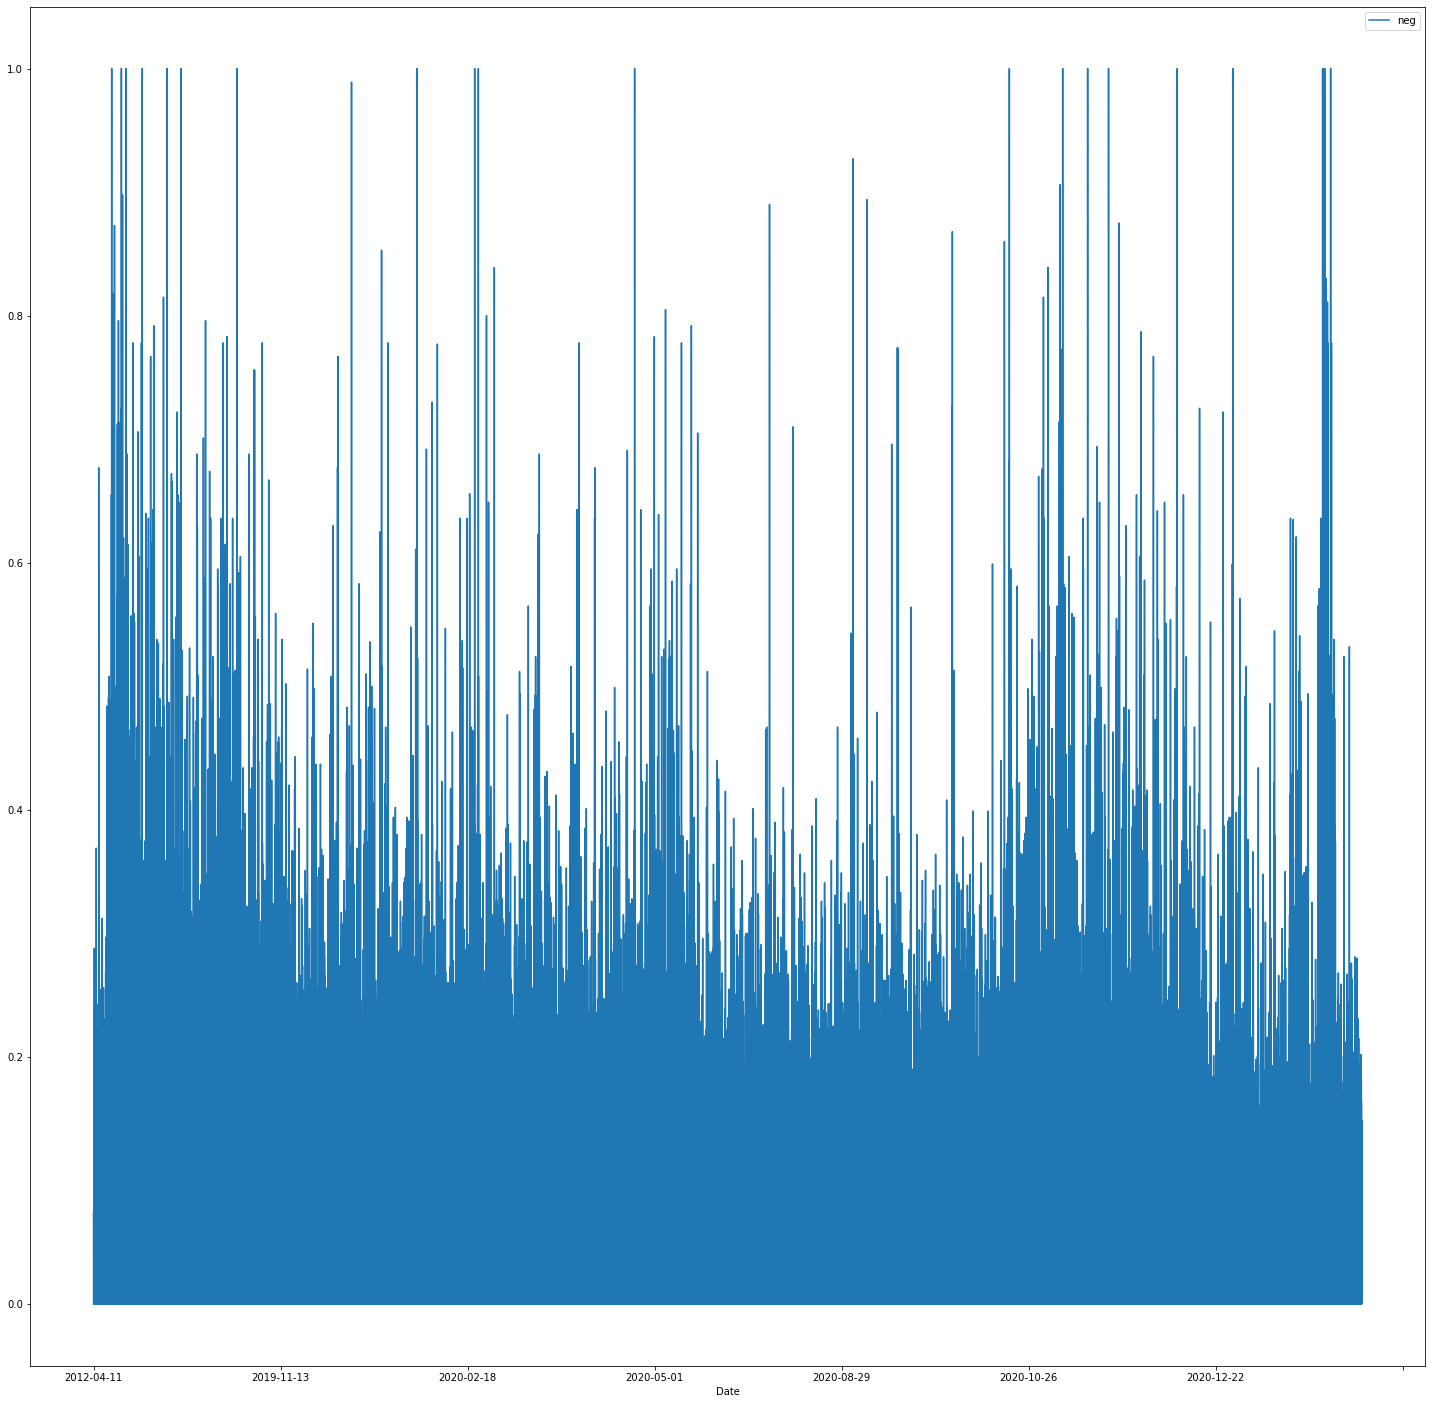

In [95]:
# Plotting negative sentiment over time
ax = newdf.plot(x='Date', y='neg')
plt.rcParams['figure.figsize']=(25,25)

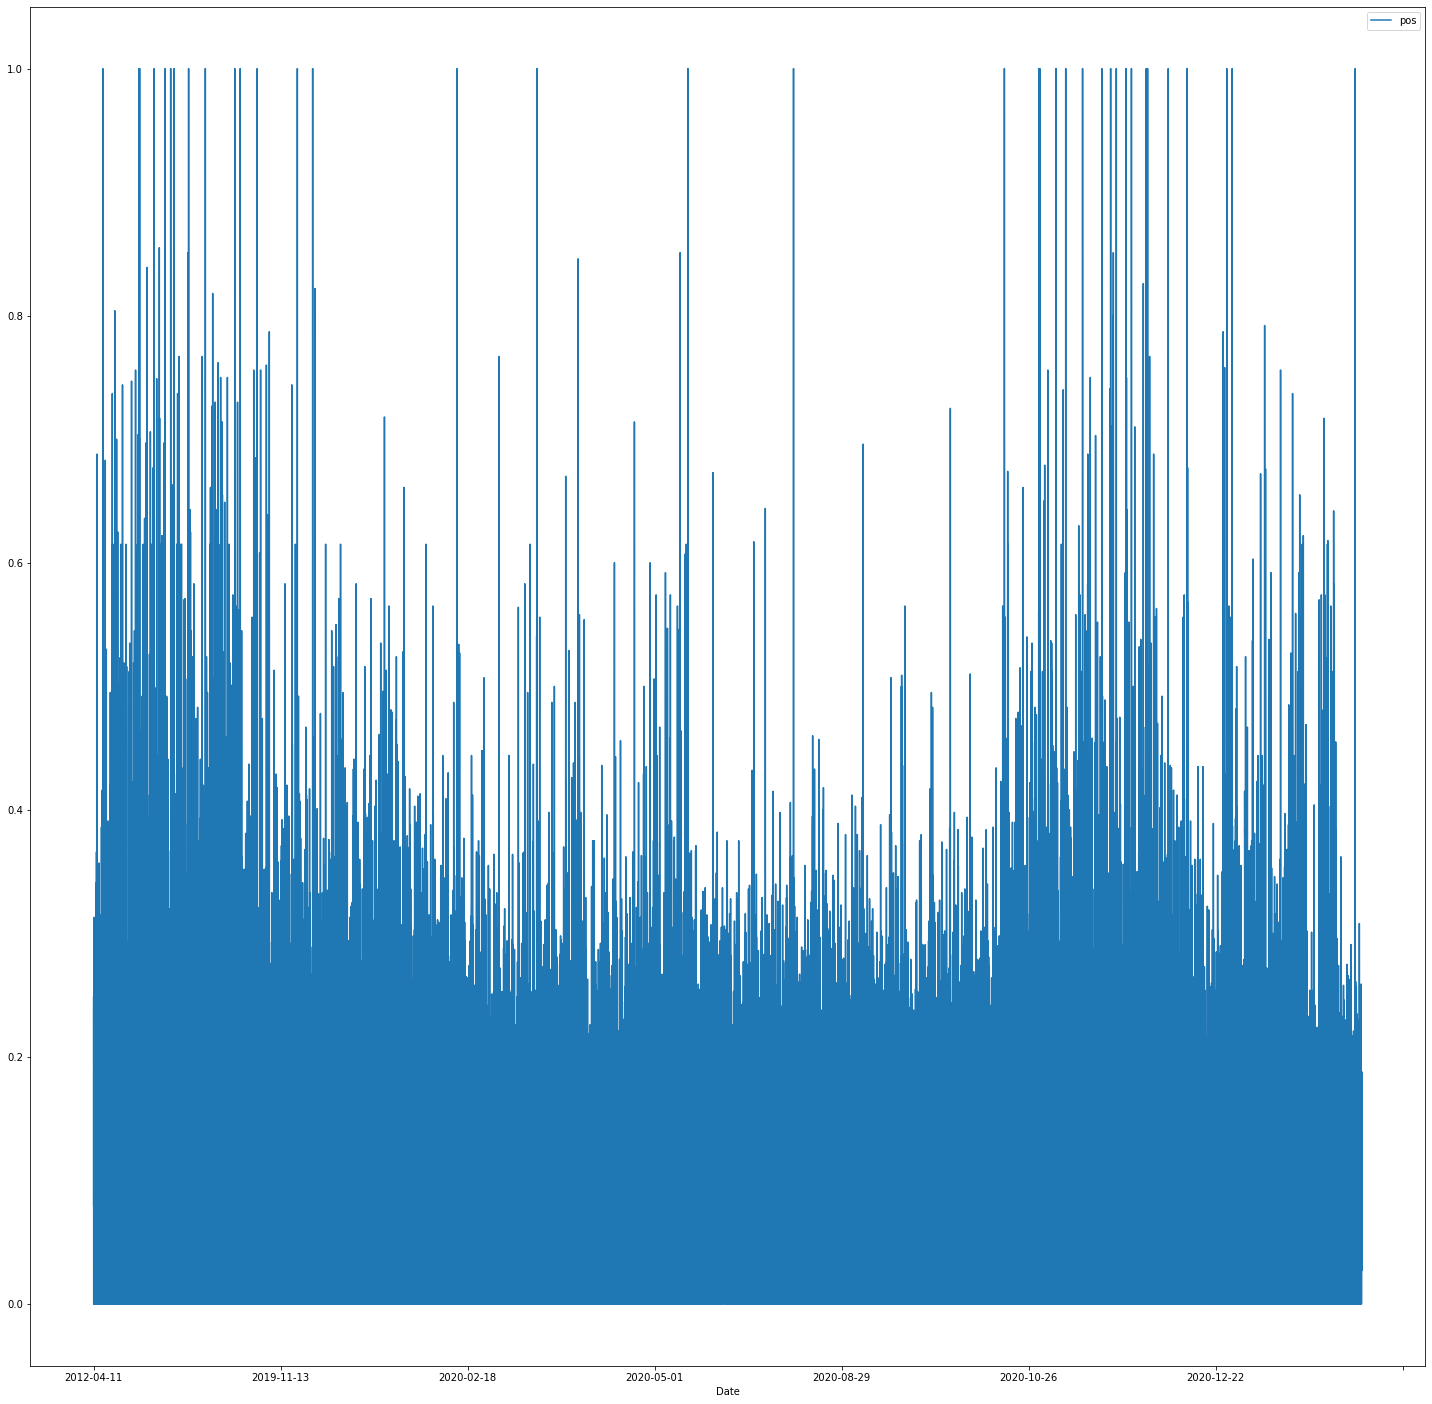

In [96]:
# Plotting positive sentiment over time
ax = newdf.plot(x='Date', y='pos')
plt.rcParams['figure.figsize']=(25,25)

### Stock Market S&P 500 History

Our stocks dataset has no outliers. For this particular dataset, we have no distributions since this dataset contains the market price over a time period. We graph the closing price of each day with the x axis representing the date and the y axis representing the market price. 

Our graph spans from January 31st, 2012 to February 12th, 2021. Due to the long time period, the x axis is ticked by years. However, our dataset does contain the closing price for every day the market opens for the entire time period. 

Our dataset is consistent and trustworthy because our data is from a valid source (Yahoo Finance). We have not manipulated the data either. The closing price of a day is the next day's opening price. 

The graph shows that the market price has generally increased from 2012 - 2021, with dips around 2018 and 2020. 2018's dip can be attirbuted to a market correction. 2020's dip is associated with COVID-19.

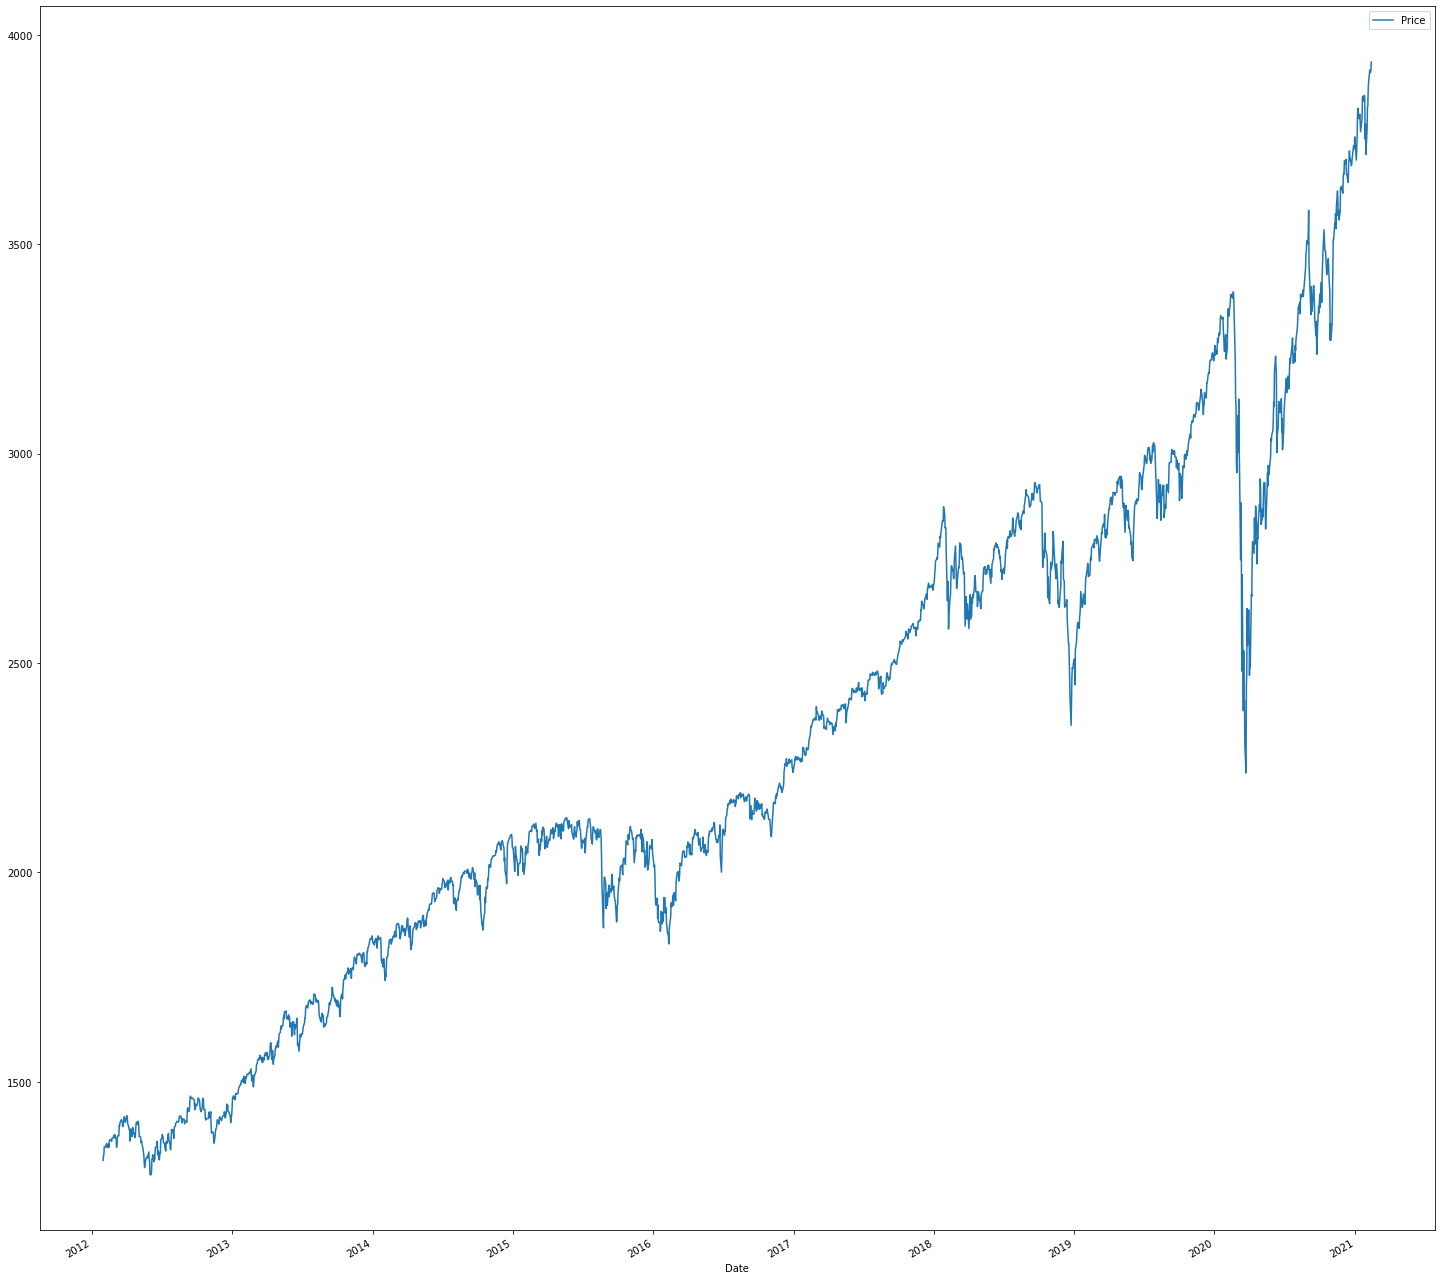

In [35]:
# Plot the date and closing price 
ax = cleaned_stocks.plot(x='Date', y = 'Price')
plt.rcParams['figure.figsize']=(20,20)

From this visualization we can clearly see the growth of the S&P 500 over the past few years.

### Using regressions to see the relationship between sentiment and the performance of the S&P 500

In [5]:
# Averaging data 

# Should create 3 dataframes PTReg, PDReg, BothReg

In [36]:
# Remove S&P 500 data where we don't have PTReg data

In [ ]:
# Combine S&P 500 and Post Title Averaged

In [ ]:
# Regression for Post Title [include scatterplot visualisation]

outcome, predictors = patsy.dmatrices('Close ~ PTAvg', PTReg)
model = sm.OLS(outcome, predictors)
output = model.fit()
print(output.summary())

In [ ]:
# Remove S&P 500 data where we don't have PDReg data

In [ ]:
# Combine S&P 500 and Post Body Averaged

In [ ]:
# Regression for Post Body [include scatterplot visualisation]

outcome, predictors = patsy.dmatrices('Close ~ PDAvg', PDReg)
model = sm.OLS(outcome, predictors)
output = model.fit()
print(output.summary())

In [ ]:
# Remove S&P 500 data where we don't have BothReg data

In [ ]:
# Combine S&P 500 and Both Averaged

In [ ]:
# Regression for Both [include scatterplot visualisation]

outcome, predictors = patsy.dmatrices('Close ~ BothAvg', BothReg)
model = sm.OLS(outcome, predictors)
output = model.fit()
print(output.summary())

# Ethics & Privacy

There is a potential bias in how we web scrape the Reddit API. This bias may come from how we build our dataset from Reddit, as just selecting certain threads might influence our dataset. Another bias could come from the culture of Reddit, in which some threads have certain patterns and trends in commenting and posting. However, we do not have biases coming from our group. We are not involved at all with Reddit, and therefore do not present a bias personally. However, if we gravitate to web scraping certain threads, then we may introduce a bias. We will try to detect bias by going through Reddit threads we are web scraping, and making sure they are threads we are unfamiliar with. 

Privacy is another problem. While Reddit data is public property, there are IDs and usernames involved. It is extremely easy to look up Reddit usernames, posts and comments to find the particular post on Reddit. We are looking into deanonymizing the data by removing names, usernames, ids, posts, and titles. We are hoping to only publish our sentiment analysis rather than our dataset to prevent people from looking up posts and usernames. If not, this will be problematic as people can target specific users by looking up posts from within the dataset. 

One consideration we do have to make in our model and thus our results from this project is that we have done some manual manipulation to the sentiment model, introducing our own additions based off of our prior knowledge of the language and slang leveraged by those that are on r/WallStreetBets. The potential issue from this is that it could introduce a bias into the compound semantic results for each of the posts. The benefit is that we get a more nuanced understanding of the sentiment in our dataset.

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*